# Regressione usando la teoria Bayesiana

La regressione lineare che abbiamo visto fino ad ora usa modello di tipo deterministico per analizzare e predire dati, ma è anche possibile usare modelli di tipo probabilistico per effettuare una regressione lineare, vediamone alcuni modelli, per maggiori info visitate questo __[link](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression)__.

All'interno di questi modelli si usa il Teorema di Bayes che stabilisce la seguente formula:

\begin{equation}
    \Large P(H_{0}|E) = \frac{P(E|H_{0})P(H_{0})}{P(E)}
\end{equation}

Dove $P(H_{0}|E)$ è detta probabilità di $H_{0}$, dato un evento $E$, $P(H_{0})$ è detta probabilità a priori di $H_{0}$, $P(E)$ è detta probabilità di osservare $E$ detta ***probabilita marginale***, mentre $P(E|H_{0})$ è la **funzione verosomigliante** ovvero una funzione di probabilità condizionata in cui **il primo argomento($E$) è fisso, mentre il secondo ($H_{0}$) è variabile**.

In questi tipi di modelli si introduce una distribuzione a priori non informativa sugli iperparametri che dovranno essere poi determinati grazie ai dati attraverso il teorema precedente, per fare un esempio ipotizziamo di avere dei dati che noi pensiamo siano distribuiti secondo una gaussiana, allora il modello dovrà determinare:

\begin{equation}
    \Large p(y | X,w,\alpha) = \mathcal{N}(Xw, \alpha)
\end{equation}

Ovvero una distribuzione probabilistica di tipo gaussiana centrata in $Xw$ e con una varianza $\alpha$ che deve essere determinata dai dati.

**Tra i vantaggi abbiamo che:**

- questi modelli si adattano ai dati per definizione
- possiamo introdurre termini di regoralizzazione per renderli più robusti

**Tra gli svantaggi abbiamo che:**

- per fare inferenza statistica si usa il teorema di Bayes che è computazionalmente molto oneroso in termini di risorse.

## Bayesian Ridge Regression

Questo modello di regressione bayesiano usa un termine di regoralizzazione $l_2$, come nella Ridge Regression, dal punto di vista probabilistico questo modello usa una distribuzione gaussiana e determina i parametri usando:

\begin{equation}
    \Large p(w|\lambda) = \mathcal{N}(w|0, \lambda^{-1}I_p)
\end{equation}

Per essere precisi al fine di determinare i pesi si utilizza la **Maximum a posteriori (MAP) usando la log marginal likelihood** ovvero:

\begin{equation}
\Large W = max_{w} \quad exp[-\frac{(y-X\beta)^{T}(y-X\beta)}{2\sigma^{2}} -\frac{\parallel \beta \parallel^{2}_{2}}{2\tau^2}]\\
\Large W = min_{w} (y-X\beta)^{T}(y-X\beta) +  \lambda \parallel \beta \parallel^{2}_{2}
\end{equation}

Sono presenti altri parametri nell'implementazione dell'algoritmo, quello che ci serve sapere è che gli $\alpha$ e i $\beta$ sono dei parametri per la definizione di una __[gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution)__ che è una distribuzione continua e che tali parametri sono definiti dai dati a partire da dei valori iniziali e quelli che non sono informativi, ovvero forniscono una vaga informazione sulla variabile sono di solito settati piccoli in modo da non influire sulla determinazione della distribuzione, per maggiori dettagli consultate __[scikit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge)__.

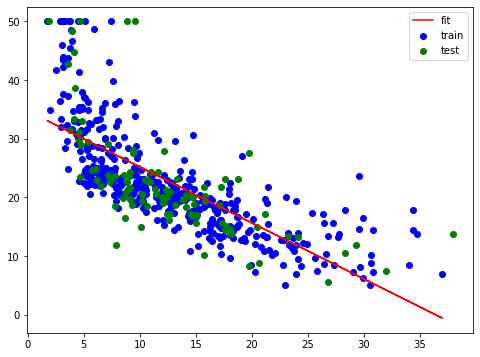

Bayesian Regression parameters estimated:
Estimated precision of noise: 0.027311512286442685
Estimated precision of weights: 1.0950943231812174
Estimated variance-covariance matrix of the weights: [[0.00170219]]
Number of iterations applied to obtain estimated parameters: 300
Value of the log marginal likelihood (to be maximized) at each iteration: [-1358.88225008 -1303.68396101 -1303.6839599  -1303.6839599 ]
Coefficients obtained: [-0.95470466] 
R^2 score on training set: 0.5710296044003613,test set: 0.43102777134445114


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

#load the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MEDV'] = data.target
#prepare the data
X_train, X_test, y_train, y_test = train_test_split(df.LSTAT.values, df.MEDV.values, 
                                                    random_state=0, test_size = 0.2)
bayesian_ridge = BayesianRidge(compute_score=True)
bayesian_ridge.fit(X_train.reshape(-1, 1), y_train)

#setting plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train, y_train, label = "train", color = "blue")
ax.scatter(X_test, y_test, label = "test", color = "green")
line, = ax.plot(X_train, bayesian_ridge.predict(X_train.reshape(-1, 1)), label = "fit", color = "red")
plt.legend()
plt.show()

print('Bayesian Regression parameters estimated:')
print(f'Estimated precision of noise: {bayesian_ridge.alpha_}')
print(f'Estimated precision of weights: {bayesian_ridge.lambda_}')
print(f'Estimated variance-covariance matrix of the weights: {bayesian_ridge.sigma_}')
print(f'Number of iterations applied to obtain estimated parameters: {bayesian_ridge.n_iter}')
print(f'Value of the log marginal likelihood (to be maximized) at each iteration: {bayesian_ridge.scores_}')
print(f'Coefficients obtained: {bayesian_ridge.coef_} ')
print(f'R^2 score on training set: {bayesian_ridge.score(X_train.reshape(-1, 1), y_train)},'
      f'test set: {bayesian_ridge.score(X_test.reshape(-1, 1), y_test)}')

In [2]:
#use bayesian regression for multiple features
X, Y = df.drop('MEDV', axis = 1).values, df.MEDV.values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size = 0.2)

bayesian_ridge = BayesianRidge(compute_score=True)
bayesian_ridge.fit(X_train, y_train)

print('Bayesian Regression parameters estimated:')
print(f'Estimated precision of noise: {bayesian_ridge.alpha_}')
print(f'Estimated precision of weights: {bayesian_ridge.lambda_}')
print(f'Estimated variance-covariance matrix of the weights:\n {bayesian_ridge.sigma_}')
print(f'Number of iterations applied to obtain estimated parameters: {bayesian_ridge.n_iter}')
print(f'Value of the log marginal likelihood (to be maximized) at each iteration: {bayesian_ridge.scores_}')
print(f'Coefficients obtained: {bayesian_ridge.coef_}')
print(f'R^2 score on training set: {bayesian_ridge.score(X_train, y_train)},'
      f'test set: {bayesian_ridge.score(X_test, y_test)}')

Bayesian Regression parameters estimated:
Estimated precision of noise: 0.04852260984263468
Estimated precision of weights: 0.6102776668911499
Estimated variance-covariance matrix of the weights:
 [[ 1.37807667e-03 -4.21686237e-05  1.14783119e-04  1.33038925e-03
   5.23898493e-04 -5.03102014e-04  2.54259490e-05  8.10729775e-04
  -7.08264350e-04  1.73865830e-06  4.19197193e-06  9.65422950e-07
  -4.28286306e-04]
 [-4.21686237e-05  2.11934550e-04  9.46457792e-05 -3.36739425e-05
   2.26167868e-04 -1.19769254e-03  3.40602275e-05 -1.23376941e-03
   1.15702942e-04 -1.22646117e-05  6.28935842e-04 -9.28306016e-07
  -5.52116221e-05]
 [ 1.14783119e-04  9.46457792e-05  3.84978972e-03 -3.29431563e-03
  -5.88290917e-03  2.96787024e-03 -4.79759035e-05  3.86353396e-03
   1.23200302e-03 -1.19937394e-04 -6.99517992e-04  8.49353980e-06
  -3.29102032e-04]
 [ 1.33038925e-03 -3.36739425e-05 -3.29431563e-03  5.54104395e-01
   3.22722392e-03 -1.40269180e-02 -2.10841800e-04  4.20558065e-03
  -5.26855992e-03  2

## Logistic Regression

La **logistic regression sebbene il nome non è in genere usato per fare la regressione, ma per fare classificazione**, la base su cui si fonda la  logistic regression è la funzione logistica che ha la seguente formula:

\begin{equation}
    \Large f(x) = C \frac{1}{1 + e^{-k(x-x_0)}}
\end{equation}

dove $C$ rappresenta il valore massimo della funzione, $k$ rappresenta la ripidità con cui sale la curva, $x_0$ rappresenta il punto in cui la funzione assume valore $f(x_0) = \frac{1}{2}$.

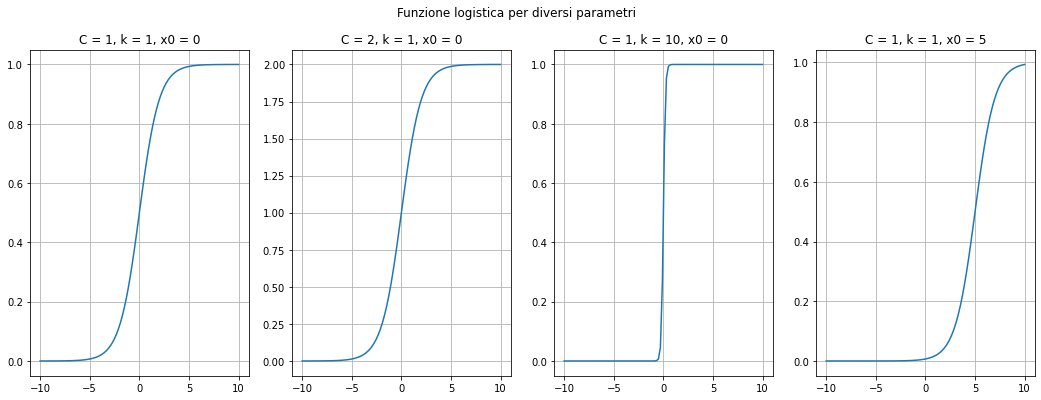

In [3]:
import numpy as np

def logistica(X, C = 1, k = 1, x0 = 0):
    return C /(1 + np.exp(-k *(X-x0)))

X = np.linspace(-10,10,100)

fig, axs = plt.subplots(1, 4, figsize = (18,6))
fig.suptitle("Funzione logistica per diversi parametri")

axs[0].plot(X, logistica(X))
axs[0].set_title("C = 1, k = 1, x0 = 0")
axs[0].grid(True)

axs[1].plot(X, logistica(X, C = 2))
axs[1].set_title("C = 2, k = 1, x0 = 0")
axs[1].grid(True)

axs[2].plot(X, logistica(X, k = 10))
axs[2].set_title("C = 1, k = 10, x0 = 0")
axs[2].grid(True)

axs[3].plot(X, logistica(X, x0 = 5))
axs[3].set_title("C = 1, k = 1, x0 = 5")
axs[3].grid(True)

plt.show()

Ora che abbiamo capito come è fatta la funzione logistica, vediamo di capire cosa fa la logistic regression guardando la formula usata per l'optimizzazione in scikit:

\begin{equation}
    \Large \min_{w,c} \frac{1-\rho}{2} w^{T}w + \rho \parallel w \parallel_{1} + C \sum_{i=1}^{n} log(exp(-y_i (X_{i}^{T} w + c)) +1)
\end{equation}

In questa equazione possiamo vedere che abbiamo sia il termine di regoralizzazione $l2$, che $l1$, il cui peso nella formula ci dice in quale misura stiamo usando le regoralizzazioni, abbiamo poi un valore $C$ iperparametro dell'equazione che dobbiamo determinare per capire in che misura vogliamo che la regoralizzazione sia determinante ed notare bene **usiamo il log sulle funzione logistiche, questo perché in questa maniera si riduce la possibilità di avere numeri enormi e computazionalmente è più veloce**.<br>
Per valutare la qualità del modello nella classificazione si possono utilizzare diverse metriche, per capire come funzionano in genere bisogna capire cosa si intendono con True Positive(TP), False Postive(FP), True Negative(TN), False Negative(FN). Al fine di capire come funziona cerchiamo di rappresentarli usando una __[confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix)__ che è qui rappresentata in maniera generica:

| Actual/Predicted |      True      |      False     |   |   |
|:----------------:|:--------------:|:--------------:|---|---|
|       True       |  True Positive | False Positive |   |   |
|       False      | False Negative |  True Negative |   |   |

In questa matrice possiamo notare che il caso ideale sarebbe se i valori sono tutti sulla diagonale poiché il modello dovrebbe essere in grado di classificare con accuratezza assoluta il dataset. In genere però per aver una singola metrica che contenga tutte le informazioni riguardo alla sua capacità di classificazione in maniera quantitativa, tra le più usate abbiamo:
- precision : $ \Large \frac{tp}{tp+tn} $
- accuracy : $ \Large \frac{\sum_{i = 0}^{N-1} I(y_{pred} = y_{true})}{N} $ con $I$ funzione di identità che fornisce il valore 1 solo se la condizione è soddisfatta e $N$è il numero di sample
- recall : $ \Large \frac{tp}{tp + fn} $
- f1 score: $ 2* \Large \frac{precision * recall}{precision + recall} $
Esistono molte altre metriche per la classificazione per maggiori info consultate __[scikit](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)__.<br>
La logistic regression può essere usata sia in condizioni di classificazione binaria che in condizione di classificazione di classi multiple , vediamo degli esempi in tal caso.

In [4]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions

#load data
df = pd.read_csv('../data/diabetes2.csv')
print('Dataset of diabetes used:')
display(df)
#prepare data
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis = 1).values,
                                                     df.Outcome.values, random_state=0, test_size = 0.2)
target_names = ['class 0', 'class 1']
#get the best classifier given training data
logistic = LogisticRegressionCV(class_weight= 'balanced', cv = 10, max_iter = 1e4).fit(X_train, y_train)
print(f'Logisitc regression score using 10 folds:\n {logistic.scores_}')
print('-'*80)
print(f'Training accuracy score: {logistic.score(X_train, y_train)}, Test accuracy score:{logistic.score(X_test, y_test)}')
print('-'*80)
print(classification_report(y_test, logistic.predict(X_test), target_names=target_names))
#create output dataframe
output = {'Probability class 0': logistic.predict_proba(X_test)[:,0],
          'Probability class 1': logistic.predict_proba(X_test)[:,1],
          'Predicted': logistic.predict(X_test),
          'True': y_test}
test_results = pd.DataFrame(data = output, index = np.arange(0, y_test.shape[0]))
print('Dataframe of the results with the classes predicted, true and probability associated')
display(test_results)

Dataset of diabetes used:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Logisitc regression score using 10 folds:
 {1: array([[0.74193548, 0.72580645, 0.70967742, 0.70967742, 0.74193548,
        0.72580645, 0.72580645, 0.72580645, 0.72580645, 0.72580645],
       [0.72580645, 0.67741935, 0.69354839, 0.72580645, 0.74193548,
        0.75806452, 0.75806452, 0.75806452, 0.75806452, 0.75806452],
       [0.75806452, 0.74193548, 0.77419355, 0.79032258, 0.80645161,
        0.80645161, 0.80645161, 0.80645161, 0.80645161, 0.80645161],
       [0.75806452, 0.74193548, 0.74193548, 0.74193548, 0.72580645,
        0.74193548, 0.74193548, 0.74193548, 0.74193548, 0.74193548],
       [0.67213115, 0.68852459, 0.6557377 , 0.68852459, 0.68852459,
        0.68852459, 0.68852459, 0.68852459, 0.68852459, 0.68852459],
       [0.67213115, 0.73770492, 0.75409836, 0.78688525, 0.78688525,
        0.78688525, 0.78688525, 0.78688525, 0.78688525, 0.78688525],
       [0.81967213, 0.80327869, 0.78688525, 0.7704918 , 0.75409836,
        0.75409836, 0.75409836, 0.75409836, 0.75409836, 0.75409

,Probability class 0,Probability class 1,Predicted,True
0,0.028167,0.971833,1,1
1,0.745021,0.254979,0,0
2,0.842474,0.157526,0,0
3,0.243233,0.756767,1,1
4,0.806568,0.193432,0,0
...,...,...,...,...
149,0.708021,0.291979,0,1
150,0.864217,0.135783,0,0
151,0.233446,0.766554,1,1
152,0.833437,0.166563,0,0


Per vedere come funziona con più classi potete vedere questo __[esempio di scikit](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html#sphx-glr-auto-examples-linear-model-plot-logistic-multinomial-py)__ in cui potete anche vedere anche al differenza dei due tipi di algoritmi di classificazione OnevsRest and Multinomial per maggiori info andate __[qui](https://scikit-learn.org/stable/modules/multiclass.html?highlight=onevsrest)__.

## Polynomial Regression

Fino ad ora abbiamo visto metodi lineari che riuscivano a classificare bene, ma in molti casi potrebbe capitare che il dataset presenta **non linearità, in tal caso dobbiamo mappare il dataset in un nuovo spazio in cui possiamo usare i metodi lineari**, scikit in tal caso fornisce come soluzione la trasformazione di dati attraverso una funzione polinomiale oppure un applicazione di una __[kernel ridge regression](https://scikit-learn.org/stable/modules/kernel_ridge.html)__ simile alla futura Support Vector Machine, ma con piccole differenze.
Cerchiamo di creare un problema per cui sia necessario tale situazione e vediamo come applicare questi strumenti usando inoltre la __[pipeline scikit](https://scikit-learn.org/stable/modules/compose.html#combining-estimators)__.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

x = np.arange(20).reshape(10,2) 
print(f'Dati originali:\n{x}')

poly = PolynomialFeatures(degree=2)
print(f'Dati tansformati usando un polinomio di grado 2:\n {poly.fit_transform(x)}')

poly = PolynomialFeatures(degree=2, interaction_only= True)
print(f'Dati tansformati usando un polinomio di grado 2 contando solo i termini'
      f'misti, le identità e il termine di grado nullo:\n{poly.fit_transform(x)}')


Dati originali:
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]
Dati tansformati usando un polinomio di grado 2:
 [[  1.   0.   1.   0.   0.   1.]
 [  1.   2.   3.   4.   6.   9.]
 [  1.   4.   5.  16.  20.  25.]
 [  1.   6.   7.  36.  42.  49.]
 [  1.   8.   9.  64.  72.  81.]
 [  1.  10.  11. 100. 110. 121.]
 [  1.  12.  13. 144. 156. 169.]
 [  1.  14.  15. 196. 210. 225.]
 [  1.  16.  17. 256. 272. 289.]
 [  1.  18.  19. 324. 342. 361.]]
Dati tansformati usando un polinomio di grado 2 contando solo i terminimisti, le identità e il termine di grado nullo:
[[  1.   0.   1.   0.]
 [  1.   2.   3.   6.]
 [  1.   4.   5.  20.]
 [  1.   6.   7.  42.]
 [  1.   8.   9.  72.]
 [  1.  10.  11. 110.]
 [  1.  12.  13. 156.]
 [  1.  14.  15. 210.]
 [  1.  16.  17. 272.]
 [  1.  18.  19. 342.]]


Possiamo quindi vedere come i dati originali nella forma $[x_0, x_1]$ sono stati trasformati nella forma $[1, x_0, x_1, x_{0}^2, x_{0}x_{1}, x_{1}^2]$ mentre con il caso `intercation_only = True` ritorna $[1, x_0, x_1, x_{0}x_{1}]$, vediamo ora come usarlo nel caso di un dataset non lineare.

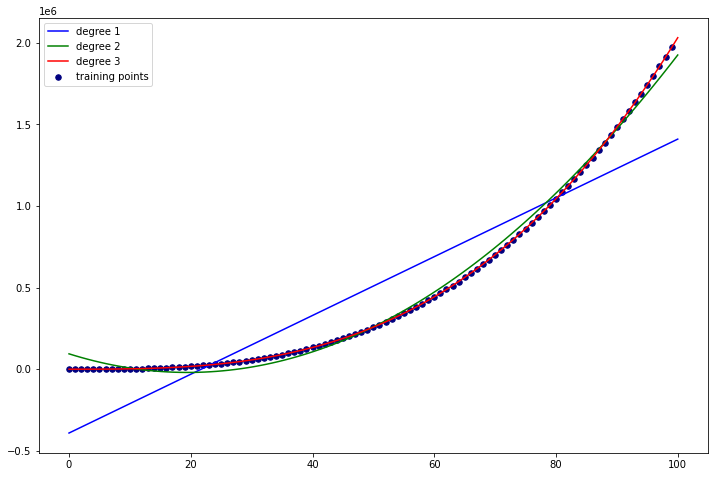

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

x = np.arange(100)
y = 2 * x**3 + 3 * x**2 + 5 * x + 4

# generate points used to plot
x_plot = np.linspace(0, 100, 100)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['blue', 'green', 'red']
fig, axs = plt.subplots(figsize = (12,8))
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

#polynomial features
for count, degree in enumerate([1, 2, 3]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count],
             label="degree %d" % degree)

plt.legend()

plt.show()

Abbiamo quindi capito come applicare trasformazioni lineari, in futuro scopriremo che questo approcio è molto sconveniente dal punto di vista computazionale a causa della dimensione sempre maggiore da tenere in conto, per questo in futuro vedremo le __[SVM](https://scikit-learn.org/stable/modules/svm.html#svm)__ per ovviare a questi problemi.

---

COMPLIMENTI AVETE FINITO IL NOTEBOOK 4 DI MACHINE LEARNING!